In [2]:
# imports and functions, does nothing

from IPython.display import Image
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from json import JSONEncoder
import json

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

def serialize(uri, o, version=''):
    try:
        os.remove(uri)
    except:
        pass
    with open(uri, "w") as f:
        if version != '':
            f.write('#version: '+version+'\n')
        json.dump(o, f, cls=NumpyArrayEncoder)

def deserialize(uri, version=''):
    if os.path.isfile(uri):
        with open(uri, "r") as f:
            data = []
            for line in f:
                if not line.startswith('#version:'):
                    data.append(line)
            return json.loads(''.join(data))
    return None

def load_or_compute(uri, compute_function):
    data = deserialize(uri)
    if data is None:
        data = compute_function()
        serialize(uri, data)
    return data

def img(path, width=400):
    rnd = random.randint(0,2e9)
    return f"""<img src="{path}?nocache={rnd}" style="width:{width}px; "></img>"""


In [3]:
data_all = np.load('datasets/quic-100p-150-40runs.npy', allow_pickle=True).item()
data = data_all['both'] # adblock + decentraleyes
urls = [url for url in data]

lengths =  [[57.1578947368421, 40.725, 57.1578947368421, 40.75], [69.85, 50.25, 69.46153846153847, 51.825], [83.15, 73.475, 83.07692307692308, 73.28205128205128], [33.825, 25.45, 33.825, 26.6], [8.575, 8.575, 8.45, 8.575], [49.0, 46.625, 48.975, 46.925], [13.775, 8.55, 13.775, 8.6], [50.85, 49.425, 50.575, 48.55], [17.7, 10.275, 17.475, 10.6], [31.125, 29.925, 30.95, 30.0], [8.425, 8.425, 8.425, 8.425], [2.111111111111111, 1.275, 1.9473684210526316, 1.475], [51.666666666666664, 34.55, 51.270270270270274, 34.6], [27.13888888888889, 24.875, 26.81578947368421, 25.05], [15.694444444444445, 13.9, 15.694444444444445, 14.375], [16.5, 4.775, 13.473684210526315, 4.75], [4.555555555555555, 4.555555555555555, 4.555555555555555, 4.555555555555555], [10.694444444444445, 8.95, 10.694444444444445, 9.275], [20.583333333333332, 19.75, 20.583333333333332, 19.825], [30.47222222222222, 18.4, 30.47222222222222, 17.425], [10.0, 7.975, 10.0, 7.875], [25.77777777777778, 9.275, 25.77777777777778, 8.9], [34.361

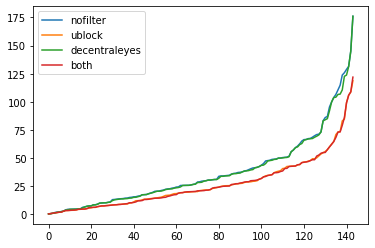

In [15]:
# understand number of subresources
lengths = []
import sys

def number_of_non_empty(samples):
    number = []
    for s in samples:
        number.append(len(samples[s]))
    return number

for url in urls:

    lengths_nofilter = number_of_non_empty(data_all['nofilter'][url])
    lengths_ublock = number_of_non_empty(data_all['adblock'][url])
    lengths_de = number_of_non_empty(data_all['decentraleyes'][url])
    lengths_both = number_of_non_empty(data_all['both'][url])

    nofilter, ublock, de, both = np.mean(lengths_nofilter), np.mean(lengths_ublock), np.mean(lengths_de), np.mean(lengths_both)

    if ublock > nofilter:
        ublock = nofilter
    if de > nofilter:
        de = nofilter
    if both > nofilter:
        both = nofilter


    lengths.append([nofilter, ublock, de, both])


print(f"lengths = ", lengths)
lengths.sort(key=lambda row: row[0])

plt.plot(np.arange(len(lengths)), [x[0] for x in lengths], label='nofilter')
lengths.sort(key=lambda row: row[1])
plt.plot(np.arange(len(lengths)), [x[1] for x in lengths], label='ublock')
lengths.sort(key=lambda row: row[2])
plt.plot(np.arange(len(lengths)), [x[2] for x in lengths], label='decentraleyes')
lengths.sort(key=lambda row: row[3])
plt.plot(np.arange(len(lengths)), [x[3] for x in lengths], label='both')

plt.legend()


In [17]:
# understand number of subresources
lengths = []
import sys

def number_of_non_empty(samples):
    number = []
    for s in samples:
        number.append(len(samples[s]))
    return number

diffs_ublock = []
diffs_de = []
diffs_both = []

for url in urls:

    lengths_nofilter = number_of_non_empty(data_all['nofilter'][url])
    lengths_ublock = number_of_non_empty(data_all['adblock'][url])
    lengths_de = number_of_non_empty(data_all['decentraleyes'][url])
    lengths_both = number_of_non_empty(data_all['both'][url])

    nofilter, ublock, de, both = np.mean(lengths_nofilter), np.mean(lengths_ublock), np.mean(lengths_de), np.mean(lengths_both)

    if ublock > nofilter:
        diffs_ublock.append(ublock-nofilter)
    if de > nofilter:
        diffs_de.append(de-nofilter)
    if both > nofilter:
        diffs_both.append(both-nofilter)


print((diffs_ublock))
print((diffs_de))
print((diffs_both))

[0.20000000000000107, 0.8999999999999986, 1.0444444444444443, 0.9972222222222222, 1.2777777777777777, 0.5588235294117645, 10.018853695324283, 0.5105580693815988, 0.17715617715617693, 0.8386123680241333, 0.4449472096530922, 0.4522144522144522, 0.21678321678321683, 1.7105263157894735, 1.1302564102564103, 2.4492307692307698, 0.4615384615384617, 1.7149122807017534, 0.050000000000000044]
[0.12415654520918196, 0.8999999999999986, 0.5, 0.47499999999999964, 0.5950292397660828, 0.3391812865497075, 0.5758258258258255, 0.2850877192982466, 0.1764264264264277, 0.2631578947368425, 1.959064327485379, 0.4809941520467831, 1.2037593984962385, 0.004385964912273721, 0.5877192982456165, 0.04970760233917915, 0.5979532163742682, 0.20870870870870917, 0.42543859649122595, 0.3406432748538013, 0.4839181286549703, 0.7514619883040936, 0.15497076023391898, 0.06486486486486598, 0.20270270270270174, 0.5728587319243559, 0.22222222222222499, 0.0588235294117645, 0.17647058823528994, 0.0588235294117645, 0.058823529411764

In [23]:
# Identify common resources

common_resources = dict()

for url in data:
    for sample in data[url]:
        for request in data[url][sample]:

            domain, fullurl, _, _, _, _, body_h, body_w = request

            if not domain in common_resources:
                common_resources[domain] = 0
            common_resources[domain] += body_h + body_w
            
tuples = list(common_resources.items())
tuples.sort(key=lambda row: -row[1])

for t in tuples[:50]:
    pass
    #print(t)

URLS_DUMMIES = ['fonts.gstatic.com', 'fonts.googleapis.com', 'apis.google.com', 'lh3.googleusercontent.com', 'www.gstatic.com', 'accounts.google.com']


DUMMIES = []
for url in data:
    for sample in data[url]:
        filtered = [request for request in data[url][sample] if request[0] in URLS_DUMMIES]
        if len(filtered) > 0:
            DUMMIES.append(filtered)

weigths = []
for requests in DUMMIES:
    for request in requests:
        weigths.append(request[3]+request[4]+request[6]+request[7])
            
lengths = [len(requests) for requests in DUMMIES]
print(np.mean(lengths))
print(np.mean(weigths))


6.945308310991957
28372.18914537173


In [ ]:
HEAVY_WEBSITES_SUBRESOURCES = []
for url in data:
    for sample in data[url]:
        if len(data[url][sample]) > 40: # magic number
            HEAVY_WEBSITES_SUBRESOURCES.append(data[url][sample])

In [4]:
# Identify the number of subresources per website
number_of_subresources = []
for url in urls:

    n_subresources = []
    for sample in data[url]:
        this_sample = data[url][sample]
        filtered_sample = [sample for sample in this_sample if sample[2] != -1] # discard empty resources
        n_subresources.append(len(filtered_sample))
        
    if np.mean(n_subresources) == 0:
        continue
    number_of_subresources.append([url, np.mean(n_subresources)])

number_of_subresources.sort(key=lambda row: row[1])

url_min_subresources = number_of_subresources[0]
url_max_subresources = number_of_subresources[-1]

print("Min", url_min_subresources)
print("Max", url_max_subresources)


Min ['vliplatform.com', 1.0]
Max ['autohubgroup.com', 151.33333333333334]


Text(0, 0.5, 'Number of websites')

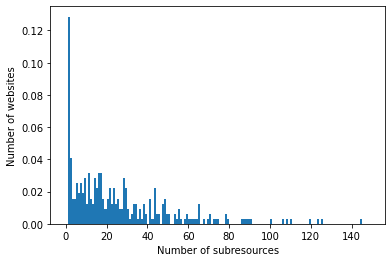

In [5]:
# plot subresources pdf

ys = [row[1] for row in number_of_subresources]
res = plt.hist(ys, bins=np.arange(0, 150, 1), density=True)
plt.xlabel("Number of subresources")
plt.ylabel("Number of websites")

There are 41 websites which load <= 2 subresources.


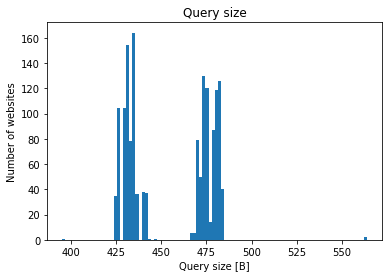

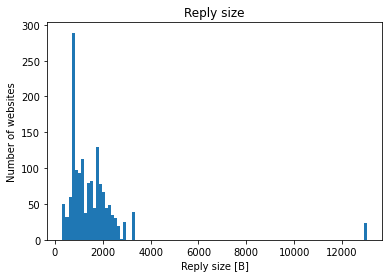

In [6]:
# Have a look only at websites who have less than X subresources
X = 2

urls_less_than_X = [row[0] for row in number_of_subresources if row[1] < X]

print(f"There are {len(urls_less_than_X)} websites which load <= {X} subresources.")

query_sizes = []
reply_sizes = []

for url in urls_less_than_X:
    samples = data[url]
    for sample in samples:
        t, up, down = data[url][sample][0] # first request
        if up > 0:
            query_sizes.append(up)
        if down > 0:
            reply_sizes.append(down)

res = plt.hist(query_sizes, bins=100)
plt.xlabel("Query size [B]")
plt.ylabel("Number of websites")
plt.title("Query size")
plt.show()

res = plt.hist(reply_sizes, bins=100)
plt.xlabel("Reply size [B]")
plt.ylabel("Number of websites")
plt.title("Reply size")
plt.show()

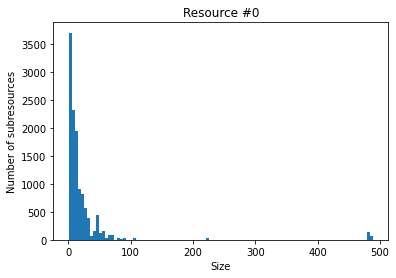

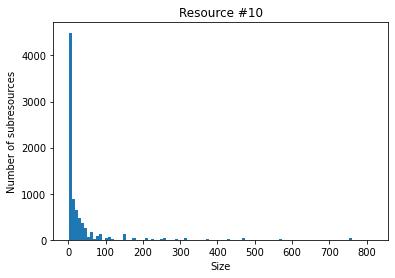

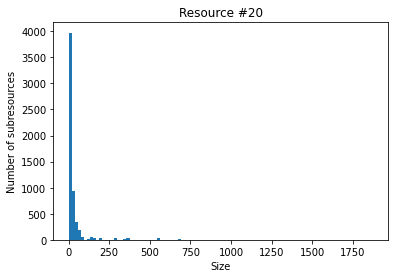

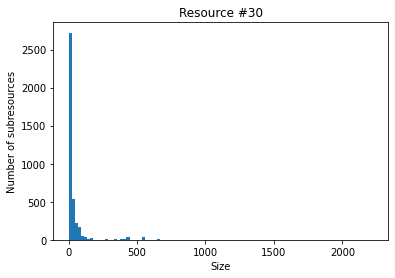

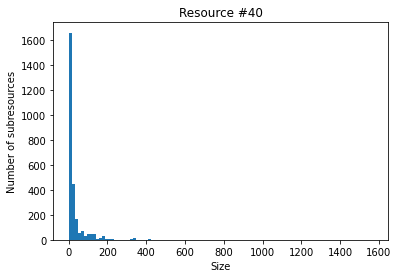

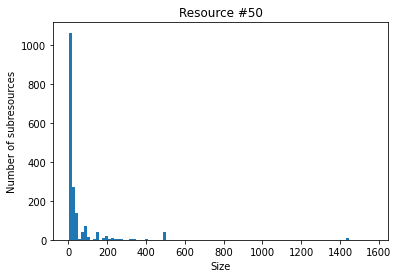

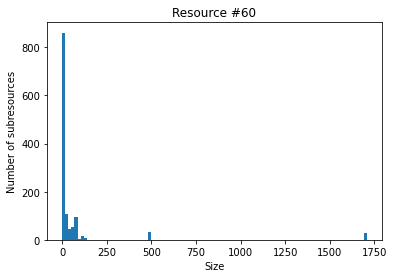

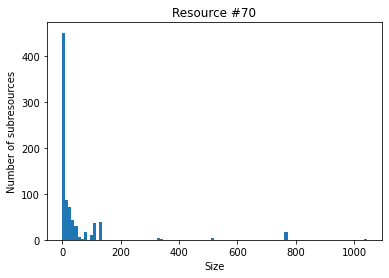

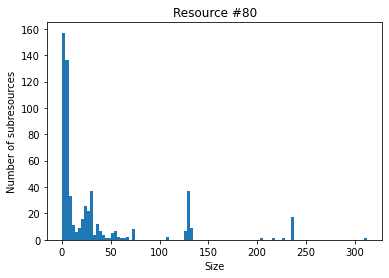

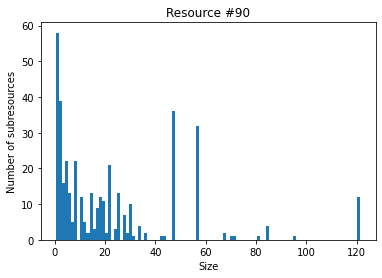

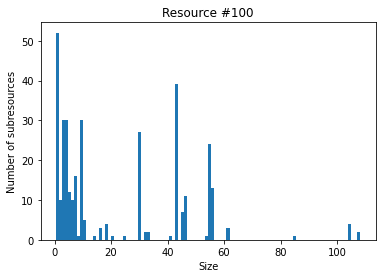

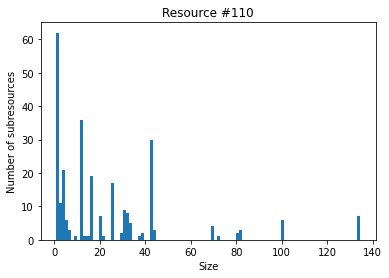

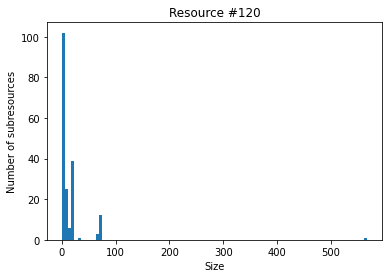

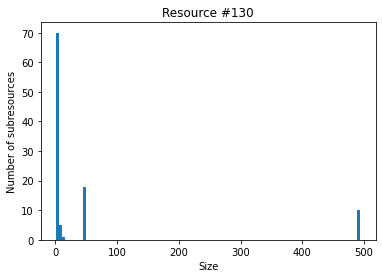

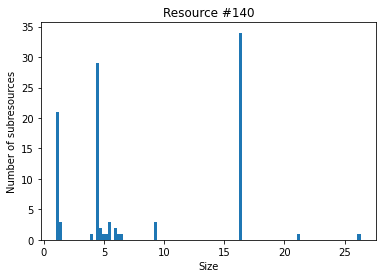

In [7]:
# are the sizes dependend on the subresource ID (position) ?
# upstream: no, between 400B and 600B
# downstream: not really, inverse-hockeystick

for subresource_pos in range(0, 150, 10):

    query_sizes = []
    reply_sizes = []

    for url in urls:
        samples = data[url]
        for sample in samples:

            if len(data[url][sample]) <= subresource_pos:
                continue

            t, up, down = data[url][sample][subresource_pos] # first request
            if up > 0:
                query_sizes.append(up)
            if down > 0:
                reply_sizes.append(down/1024)
    
    res = plt.hist(reply_sizes, bins=100)
    plt.xlabel("Size")
    plt.ylabel("Number of subresources")
    plt.title(f"Resource #{subresource_pos}")
    plt.show()

In [8]:
# Have a look only at websites who have exactly X subresources
for X in range(0, 150,1):
    urls_matching = [row[0] for row in number_of_subresources if round(row[1]) == X]

    print(f"There are {len(urls_matching)} websites which load == {X} subresources.")



There are 0 websites which load == 0 subresources.
There are 37 websites which load == 1 subresources.
There are 12 websites which load == 2 subresources.
There are 7 websites which load == 3 subresources.
There are 6 websites which load == 4 subresources.
There are 8 websites which load == 5 subresources.
There are 5 websites which load == 6 subresources.
There are 8 websites which load == 7 subresources.
There are 5 websites which load == 8 subresources.
There are 8 websites which load == 9 subresources.
There are 7 websites which load == 10 subresources.
There are 8 websites which load == 11 subresources.
There are 7 websites which load == 12 subresources.
There are 3 websites which load == 13 subresources.
There are 11 websites which load == 14 subresources.
There are 6 websites which load == 15 subresources.
There are 10 websites which load == 16 subresources.
There are 9 websites which load == 17 subresources.
There are 6 websites which load == 18 subresources.
There are 3 websit

In [9]:
X = 2
urls_len_matching = [row for row in number_of_subresources if round(row[1]) == 2]
urls_matching = [row[0] for row in urls_len_matching]
print(f"There are {len(urls_matching)} websites which load == {X} subresources.")

data_matching = dict()
for row in urls_len_matching:
    url, count = row
    data_matching[url] = data[url]
    print(url, count)

There are 12 websites which load == 2 subresources.
apiexpossandbox.mile.app 1.675
smileytoysandgames.com 1.725
publyads.jstag.space 1.775
ronbpost.com 1.975
binaryws.com 2.0
cialisdr.com 2.0
viaagra1.com 2.051282051282051
muk-toon.com 2.075
thanesamikshak.in 2.3
www.thaitoon.net 2.3421052631578947
venona.com 2.3846153846153846
myegypthost.com 2.388888888888889
